### Individual lines


Checking the lines for some sources

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.constants import c
from astropy.convolution import Gaussian1DKernel, convolve

import sys , os
sys.path.append("../../src/lines")

import lineTools as lt


### working dir. and files
wd = "/home/stephane/Science/RadioGalaxy/ALMA/absorptions/analysis/a/"
os.chdir(wd)

datadir   = "dataSpecAll/"
dbline    = "lineAll.db"
transfile = "splatalogue.csv"
dirplot   = "plots/"


In [44]:
def plotSource(lines, vel, amp , vx):
    "Overplot the different candidate lines"
#    
    plt.figure(figsize=(8.0,4.5))
    style = ["k-","r--", "b.-"]
    plt.xlim(vx[0],vx[1])

    
    for lindex in range(len(lines)):
        v = vel[lindex]
        a = amp[lindex]
        s = style[lindex]
        plt.step(v, a,  s , linewidth = 1.0 , label = lines[lindex][0])
    
    plt.xlabel ("v (km/s)")
    plt.ylabel(r"$S^*$")
    plt.legend()
    
    plt.show()

In [45]:
def getData(dataid, z, freqtrans):
    al = lt.analysisLines(dbline)
    cmdsql = "select filedata FROM dataset WHERE dataid = '%d'"%(dataid)
    resdb = al.query(cmdsql)
    
    pl = lt.plotLines("fake", "fake", "fake")
    datafile = datadir + resdb[0][0]
    
    freq , amp = pl.extractData(datafile)
    amp = amp / np.mean(amp)
    print(amp)
    freq = freq * (1. + z)
    dv = c.value * 1e-3 *  (freq - freqtrans) / freqtrans
    
    return(dv , amp)
    

### Source J2148

11..
11..
[0.99431806 0.99447008 0.99474311 0.99539668 0.99769594 0.99703587
 0.99858054 0.99886357 1.00029023 1.0017899  1.00108182 1.00217544
 0.99846053 1.00003821 1.00075179 1.00058727 1.00250348 1.00140686
 1.00148537 1.00116983 1.00190391 1.00316406 1.00193142 1.00067328
 1.00148187 1.00135235 0.99992769 0.99890258 1.00077979 1.00065877
 0.99985718 0.99885357 0.99841652 0.99825751 0.99866355 0.9991216
 1.00252148 0.99868705 0.99975467 1.00137135 1.00062577 0.9999802
 1.00106382 1.00073578 1.00095581 1.00079579 0.99803848 0.99896808
 0.99859854 0.99784446 0.99853354 1.00056526 0.99970867 1.00040075
 1.0017749  1.00240097 1.0009168  1.00293803 1.00130185 1.00097281
 0.99918111 0.9991016  0.99916611 0.99810899 0.99788946 0.99975817
 0.99982868 1.00004921 1.00070128 1.00026473 1.00104032 0.99955365
 1.00033024 1.00029873 0.99877556 1.00109632 1.00123334 1.0017594
 1.00012872 1.00138036 0.99879807 0.99837102 0.99827101 0.99801348
 0.99971917 0.99920111 0.99993719 1.00016822 1.00100431

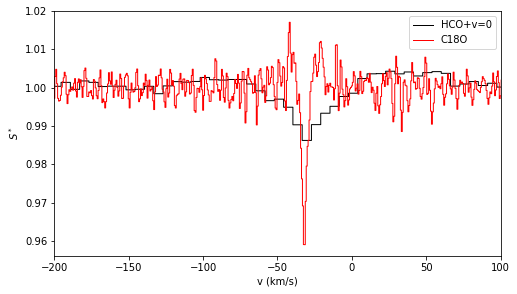

In [46]:
print("11..")
z = 0.898300
lines = []
line1 = ("HCO+v=0", 178.37506 , 4762)
lines.append(line1)
line1 = ("C18O", 439.08877 , 2041)
lines.append(line1)

print("11..")

velline = []
ampline = []

for l in lines:
    dv , amp = getData(l[2], z , l[1])
    amp = amp / np.mean(amp) 
    ampline.append(amp)
    velline.append(dv)
    
plotSource(lines, velline, ampline, [-200., 100.])
